<img src="https://faculty.washington.edu/pmacc/LO/Figs/splash.png" align="right" alt="Model Image" style="width: 250px;">

# Live Ocean Virtual Mooring Data

This script is intended get us started loading and plotting model predictions by UW's Live Ocean model. Parker MacCready has kindly shared 2-years of model predictions at several locations in the Salish Sea, WA. Though the model is 3-D, it is often much easier to examine data in 1 or 2-dimensions, and here we will simplify our analysis by examining data at just a few locations. More advanced techniques are needed to exmamine data in 3 or 4 dimensions (e.g. x,y,z,t).

The Live Ocean model is driven by the numerics in the hydrodynamic model often referred to as ROMS (https://www.myroms.org/). This is a widely used circulation model.

If interestred, take a look at the model description on the [Model Page](https://faculty.washington.edu/pmacc/LO/LiveOcean.html) and in [Sutherland 2011 et al](https://journals.ametsoc.org/view/journals/phoc/41/6/2011jpo4540.1.xml)




<img src="../Images/model_locations.png" align="right" hspace=”50” vspace=”50” alt="Model Image" style="width: 500px;">

## Model Data Locations

The model data is contained in netcdf (.nc) files in the datasets folder. The three locations you will consider are
Admiratly Inlet, North Hood Canal and South Hood Canal. The model predictions covers the two calendar years of 2017 and 2018.

Below we will learn how to load netcdf files and take advantage of many built in plotting functions contained in python packages

## Loading Packages
You'll see below that we need to load several packages including one you have not seen called xarray. Xarray is an excellent package for handling netcdf timeseries data and is commonly used by oceanographers in their data analysis. It is already in installed in Google Colabs, but if you are working locally you can use conda to install by using the following command in a command terminal: 

**conda install -c conda-forge xarray dask netCDF4 bottleneck**

If you are not using conda you can also use pip

**pip install xarray**

For more details see, http://xarray.pydata.org/en/stable/installing.html

In [3]:
# First we import the packages we want to use, note we must install netcdf4
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

## Locating the model data

If you are working on a local installation, and have cloned the repository onto your machine, the model data is located in the Datasets folder. We can set this path the variable below

In [4]:
data_fol = '../Datasets'

If you are using Google Colabs, you will need to download this script and the data from the repo, and upload it to your google drive into a new working folder. Then navigate to that folder using the commented code below

In [5]:
# Uncomment and adjust as neccssary to work with Google drive
#!pip install netcdf4 
#from google.colab import drive
#import os
#drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/YourWorkingFolder')
#data_fol = ''

## Opening the data
Here we will load in the data with xarray and do a couple things to it, first transposing it so that when plotting time is on the x-axis, and second, defining a depth variable 's_rho'. Everything is contained in the xarray dataset, 'ds'.

In [12]:
# Choose a location to load
fname = 'admiralty.nc'

# Now use xarray to open the netcdf dataset
ds = xr.open_dataset(data_fol + '/' + fname)

# We are going to transpose two variables so that plots show time on x-axis
ds = ds.transpose('s_rho', 'ocean_time', 's_w', 'scalar')

# We will also set the s_rho dimension, which is the model layer, to the mean depth.
#  this will make it more intuitive we examine the modeled variables
ds['s_rho']=ds['z_rho'].mean(dim='ocean_time')
ds['s_rho'].attrs = {'long_name': 'Elevation', 'units': 'm'}

When you have a dataset or dataframe it's always nice to list out the keys, so you can see what kind of data you have. In this we have quite a few variables

In [16]:
# Let's look inside, see what variables are present
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:        (ocean_time: 17521, s_rho: 30, s_w: 31, scalar: 1)
Coordinates:
  * ocean_time     (ocean_time) datetime64[ns] 2017-01-01 ... 2019-01-01
  * s_rho          (s_rho) float64 -108.9 -105.7 -102.7 ... -0.8719 -0.2032
Dimensions without coordinates: s_w, scalar
Data variables:
    h              (scalar) float64 ...
    lon_rho        (scalar) float64 ...
    lat_rho        (scalar) float64 ...
    lon_u          (scalar) float64 ...
    lat_u          (scalar) float64 ...
    lon_v          (scalar) float64 ...
    lat_v          (scalar) float64 ...
    zeta           (ocean_time) float64 ...
    ubar           (ocean_time) float64 ...
    vbar           (ocean_time) float64 ...
    Pair           (ocean_time) float64 ...
    Uwind          (ocean_time) float64 ...
    Vwind          (ocean_time) float64 ...
    shflux         (ocean_time) float64 ...
    latent         (ocean_time) float64 ...
    sensible       (ocean_time) float64 ...
    lw

Generally there is some additional information in the attributes of a given variable, for example if we examine the attributes of CaCO3 we see that it is calcium carbonate concentration in mmol per m^3

In [28]:
ds['CaCO3'].attrs

{'long_name': 'Calcium Carbonate', 'units': 'millimole_carbon meter-3'}

## Plotting
Plotting can be very fast when using xarray's internal plotting functions. Let's use just a single line to make a heat map of NO3 (Nitrate) in time and depth

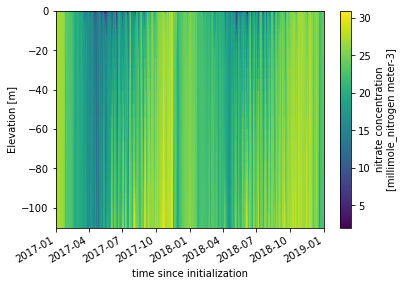

In [29]:
# Plot ds variable
ds['NO3'].plot()

## Plotting with a little more control
It's difficult to see the variations in time, can we zoom in and make the plot bigger? The answer is yes, of course.

* We can zoom in time by creating a new dataset that slices the time dimension by a start and end date. 
* We can also slice in depth with the 's_rho' variable in the same way
* We can make the plot bigger by first specifying some figure parameters, including figsize. Note this is in inches

See the example below.

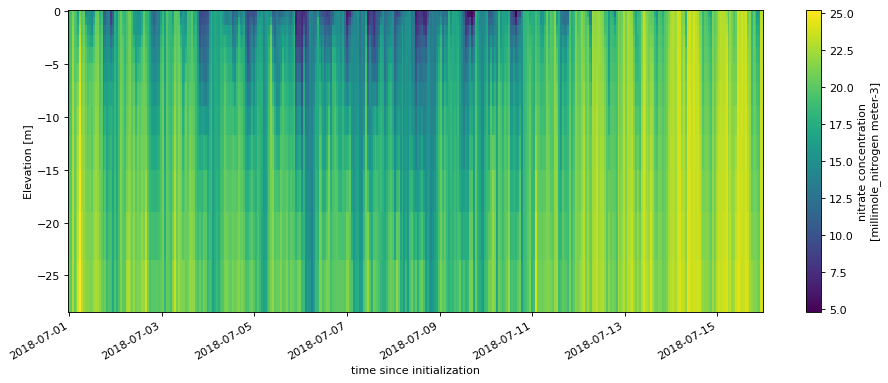

In [35]:
# Time slice
sdate = '2018-07-01'
edate = '2018-07-15'
ds_no3_summer = ds['NO3'].sel(ocean_time=slice(sdate,edate))

# Slicing out just the surface 30-m's 
ds_no3_summer_surf = ds_no3_summer.sel(s_rho=slice(-30,0))

# Plot the temperature, summer, surface. And make it nice and big
f = plt.figure(num=None, figsize=(14,5), dpi=80, facecolor='w', edgecolor='k')
ds_no3_summer_surf.plot()

Any ideas what might be going on here? Looks like there is some cycling each day.

## Subplots: Plotting a depth profile of a single time step
The below example shows the temperature, salinity, and density (rho) for a typical day in Summer (blue) and Winter (red). There are some sophisticated plotting calls going on below, including subplots, see if you can understand what's going on. Can you examine the data at a different time? Or for a different variable?

Text(0, 0.5, 'Elevation [m]')

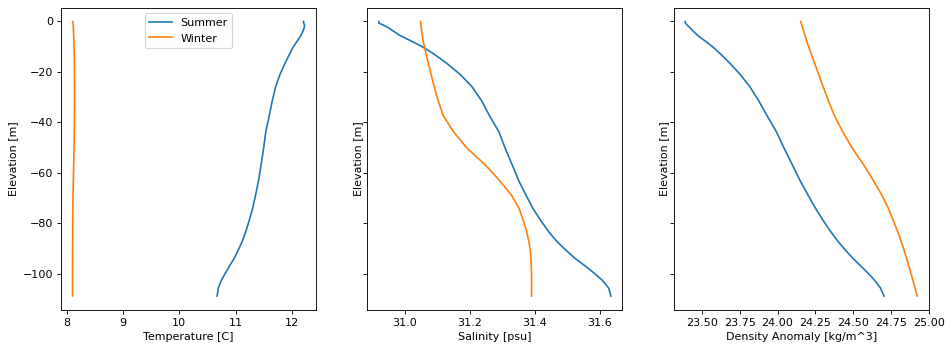

In [37]:
# Plot depth profiles at a single time,
mydate1 = '2018-09-01 12:01' #Make sure to select a specific hour
mydate2 = '2018-01-01 12:01' #Make sure to select a specific hour

t_profile1 = ds['temp'].sel(ocean_time=mydate1,method='nearest').transpose()
t_profile2 = ds['temp'].sel(ocean_time=mydate2,method='nearest').transpose()

s_profile1 = ds['salt'].sel(ocean_time=mydate1,method='nearest').transpose()
s_profile2 = ds['salt'].sel(ocean_time=mydate2,method='nearest').transpose()

r_profile1 = ds['rho'].sel(ocean_time=mydate1,method='nearest').transpose()
r_profile2 = ds['rho'].sel(ocean_time=mydate2,method='nearest').transpose()


f = plt.figure(num=None, figsize=(14,5), dpi=80, facecolor='w', edgecolor='k')
(ax1, ax2, ax3) = f.subplots(1, 3, sharey=True)

plt.sca(ax1)
plt.plot(t_profile1.data,t_profile1['s_rho'],label='Summer')
plt.plot(t_profile2.data,t_profile2['s_rho'],label='Winter')
plt.xlabel('Temperature [C]')
plt.ylabel('Elevation [m]')
plt.legend()

plt.sca(ax2)
plt.plot(s_profile1.data,t_profile1['s_rho'])
plt.plot(s_profile2.data,t_profile2['s_rho'])
plt.xlabel('Salinity [psu]')
plt.ylabel('Elevation [m]')

plt.sca(ax3)
plt.plot(r_profile1.data,t_profile1['s_rho'])
plt.plot(r_profile2.data,t_profile2['s_rho'])
plt.xlabel('Density Anomaly [kg/m^3]')
plt.ylabel('Elevation [m]')
